## Mission 1. Netfilx and Code

### Mandatory Part

In [1]:
import pandas as pd
# Netfilx data 불러오기
netfilx = pd.read_csv('./netflix_titles.csv')
# country가 South Korea 인 row의 count
netfilx[netfilx['country'] =='South Korea']['country'].count()

183

### Bonus Part

In [2]:
# 방법 1 - 리스트 사용

# 빈 리스트 생성
list_country = []
# float type 의 결측치 와 ',' 제거 인 인덱스를 빈 리스트에 추가
for i in range(len(netfilx)):
    if type(netfilx['country'][i]) ==str:
        if ',' not in netfilx['country'][i]:
            list_country.append(i)

# 조건에 맞는 인덱스로 추출한 후 counter 를 통해 최댓값 추출
from collections import Counter 
Counter(netfilx['country'][list_country]).most_common(1)

[('United States', 2555)]

In [3]:
# 방법 2 - 데이터 프레임 사용
states = netfilx[~netfilx['country'].fillna(',').str.contains(',')].groupby(['country']).count().sort_values(by = 'show_id', ascending = False).index[0]
count = netfilx[~netfilx['country'].fillna(',').str.contains(',')].groupby(['country']).count().sort_values(by = 'show_id', ascending = False).iloc[0,1]
print(states, count)

United States 2555


In [4]:
# 방법 2 의 가독성을 위한 코드 정리

# float 타입의 결측치를 ',' 로 변경
netfilx['country'] = netfilx['country'].fillna(',')

# country column 에서 ',' 가 포함되는 row 제거
netfilx = netfilx[~netfilx['country'].str.contains(',')]

# groupby.count 를 통해 country 별 빈도 수를 구하고 이를 sort_values 를 통해 내림차순으로 정렬
states = netfilx.groupby(['country']).count().sort_values(by = 'show_id', ascending = False).index[0]
count = netfilx.groupby(['country']).count().sort_values(by = 'show_id', ascending = False).iloc[0,1]
print(states, count)

United States 2555


## Mission 2. 가즈아!

### Mandatory Part

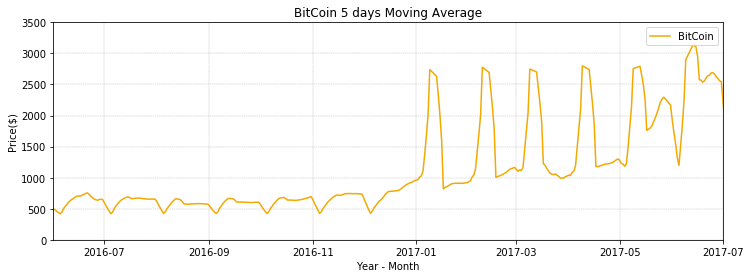

In [6]:
import matplotlib.pyplot as plt 

# bitcoin data 불러오기
bitcoin = pd.read_csv('./BitCoin.csv')
# 'Date' column 을 datetime type 으로 변경 
bitcoin['Date']= bitcoin['Date'].astype('str')
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

# 'Date' column 을 기준으로 sort
bitcoin = bitcoin.sort_values(by = 'Date')
# Date column 으로 index 설정
bitcoin = bitcoin.set_index('Date')
# 이동평균법으로 새로운 Series 를 생성
roll_mean5_bitcoin = pd.Series.rolling(bitcoin['Open'], window=5, center = False).mean()

# plot 그리기
fig = plt.figure(figsize = (12, 4))

plt.plot(roll_mean5_bitcoin, color= '#f2a900' , label='BitCoin')

plt.xlabel("Year - Month") 
plt.ylabel("Price($)")
plt.axis(['2016-6-1', '2017-7-1',0,3500])
plt.grid(True, lw=0.4, ls='--')
plt.title("BitCoin 5 days Moving Average")
plt.legend(loc = 'best')

plt.show()


### Bonus Part

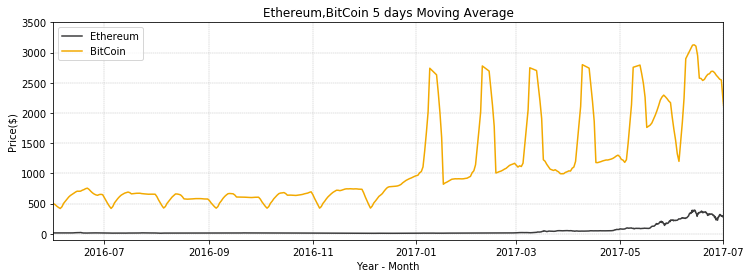

In [7]:
# Ethereum data 불러오기
ethereum = pd.read_csv('./ETH_1H.csv')

# 'Date' column 을 datetime type 으로 변경 
ethereum['Date']= ethereum['Date'].astype('str')
ethereum['Date'] = pd.to_datetime(ethereum['Date'])

# 'Date' column 을 기준으로 sort
ethereum = ethereum.sort_values(by = 'Date')
# Date column 으로 index 설정
ethereum = ethereum.set_index('Date')
# 이동평균법으로 새로운 Series 를 생성
roll_mean5_ethereum = pd.Series.rolling(ethereum['Open'], window=5, center = False).mean()

# plot 그리기
fig = plt.figure(figsize = (12, 4))

plt.plot(roll_mean5_ethereum, color= '#3c3c3d' , label='Ethereum')
plt.plot(roll_mean5_bitcoin, color= '#f2a900' , label='BitCoin')

plt.xlabel("Year - Month") 
plt.ylabel("Price($)")
plt.axis(['2016-6-1', '2017-7-1',-100,3500])
plt.grid(True, lw=0.4, ls='--')
plt.title("Ethereum,BitCoin 5 days Moving Average")
plt.legend(loc = 'best')

plt.show()